#Content:
 1. Introduction
 2. Decision Tree
 3. Random Forest


## Introduction

In the following, I will run several machine learning algorithms. At first, I will focus on decision trees and random forest which have not yet been evaluated.
I will be using the python library sklearn.

### Loading Data and Restructering

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.decomposition import PCA
from sklearn import metrics


from subprocess import check_output
fraud_data = pd.read_csv("../creditcard.csv")

X = fraud_data.ix[:, fraud_data.columns != 'Class'] 
y = fraud_data.ix[:, fraud_data.columns == 'Class'] 

### splitting data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###looking at the data

fraud_data.head()

/home/lavanya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/home/lavanya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It is not necessary to scale or drop the time and amount because the algorithms are not scaling sensitive. The following function will be used for visualizing the developed models, which was taken from the work of joparga3.

In [11]:
def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

## Decision Tree

The following code estimates a decision tree based on the training data set and compares the prediction with the training data sample. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.75      0.75       101

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



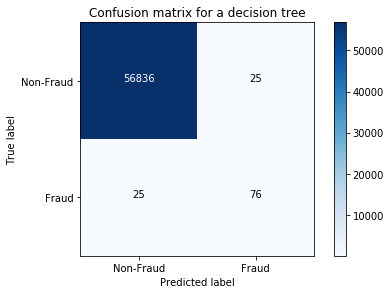

In [14]:
desctree=DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
pca= PCA()
X_train_dtree = pd.DataFrame(pca.fit_transform(X_train))
desctree.fit=desctree.fit(X_train, y_train)
Y_train_dtree = pd.DataFrame(desctree.predict(X_test))
classification = metrics.classification_report(y_test, Y_train_dtree)
print(classification)
cnf_matrix_dtree = confusion_matrix(y_test, Y_train_dtree)
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for a decision tree')
plt.show()

## Random Forest

The following code estimates a random forest based on the training data set and compares the prediction with the training data sample. 

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


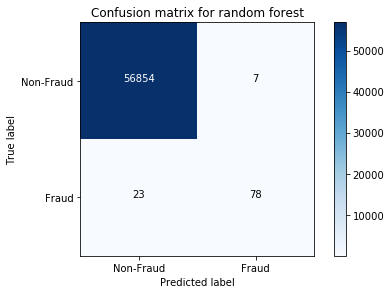

In [4]:
rforest= RandomForestClassifier(criterion='entropy')
rforest.fit=rforest.fit(X_train,y_train)
Y_train_rforest = pd.DataFrame(rforest.predict(X_test))
cnf_matrix_rforest = confusion_matrix(y_test, Y_train_rforest)
plt.figure()
plot_confusion_matrix(cnf_matrix_rforest, title='Confusion matrix for random forest')
plt.show()